In [13]:
# lib
import numpy as np
import matplotlib.pyplot as plt
import torch

In [14]:

num_positions = 1114112 # 0 - 1114111
num_positions = 50000

d_model = 1024

In [15]:
def cosine_similarity(vec1, vec2):
    vec1_norm = np.linalg.norm(vec1) + 0.00000000001
    vec2_norm = np.linalg.norm(vec2) + 0.00000000001
    return np.dot(vec1, vec2) / (vec1_norm * vec2_norm)
def cosine_similarity_matrix(vectors):
    return np.array([[cosine_similarity(vec1, vec2) for vec2 in vectors] for vec1 in vectors])


def plot(x, title=''):
  plt.figure(figsize=(7,4))
  plt.pcolormesh(x,
                # Use a diverging colormap so it's clear where zero is.
                cmap='RdBu', vmin=-1, vmax=1)
  plt.xlim([0,d_model])
  plt.ylabel('num_positions')
  plt.xlabel('d_model')
  plt.title(title)

  plt.colorbar()

def plot_similarity(x, title):
  similarity_matrix = cosine_similarity_matrix(x)
  plt.figure(figsize=(5,4))
  plt.pcolormesh(similarity_matrix,
                # Use a diverging colormap so it's clear where zero is.
                cmap='RdBu', vmin=-1, vmax=1)
  plt.xlim([0,num_positions])
  plt.ylabel(num_positions)
  plt.xlabel(num_positions)
  plt.title(f'plot_similarity {title}')
  plt.colorbar()

def make_circle():
  x = np.arange(0, d_model)
  y = np.arange(0, num_positions)
  arr = np.zeros((y.size, x.size))
  cx = d_model / 2.
  cy = num_positions / 2.
  r = num_positions / 2.
  mask = (x[np.newaxis,:]-cx)**2 + (y[:,np.newaxis]-cy)**2 < r**2
  arr[mask] = 1.
  return arr


In [16]:
i_s = np.arange(d_model//2)
# print(i_s)
min_rate = 1/1000000
exponents = (2 / d_model) * i_s # [0, 1]
# print(exponents)
omegas = min_rate**exponents # [1, 0.0001]
omegas = omegas[np.newaxis, :]
# print(omegas, omegas.shape)

In [17]:
positions = np.arange(num_positions)
positions = positions[:, np.newaxis]
# print(positions, positions.shape)
# print((positions/omegas))
sines = np.sin(positions*omegas)
cosines = np.cos(positions*omegas)
# print(sines)
# print(cosines)
pos_encoding = np.concatenate([sines, cosines], axis=-1)
pos_encoding_ziped = np.reshape(np.stack((sines, cosines), axis=-1), (num_positions, d_model))

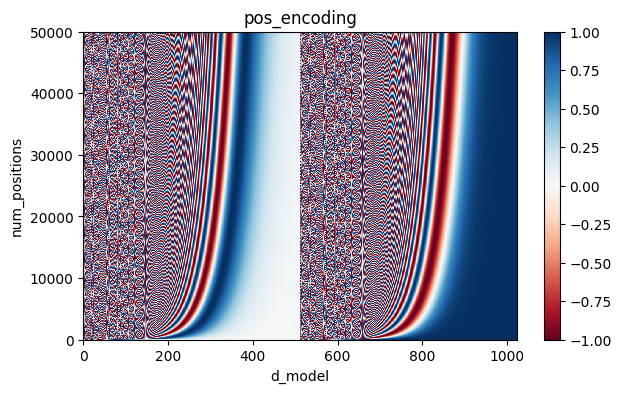

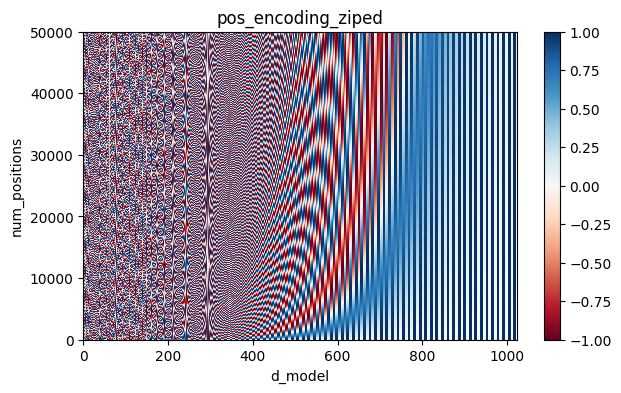

In [12]:
plot(pos_encoding, 'pos_encoding')
plot(pos_encoding_ziped, 'pos_encoding_ziped')

